<a href="https://colab.research.google.com/github/deepthipaip/Projects/blob/main/Sparks_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARKS FOUNDATION- GRIP**

**DATA SCIENCE AND BUSINESS ANALYTICS**

**NAME: DEEPTHI PAI P**

**TASK 1: PREDICTION USING SUPERVISED ML**


Q) Predict the percentage of a student based on the number of hours of study.

Dataset: http://bit.ly/w-data


**Step 1: Import libraries**

The necessary libraries are imported.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Step 2: Importing and reading dataset**

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
# The first five values in the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Step 3: Exploratory Data Analysis (EDA)**

In [4]:
# Check for missing values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

**Visualization**

Understanding the relationship between the variables.

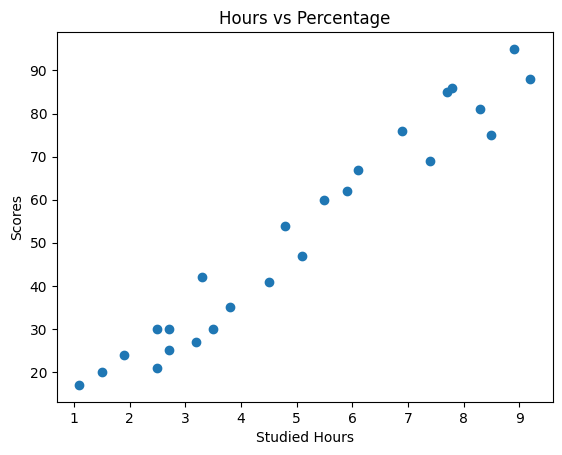

In [7]:
# Hours vs Percentage of scores
plt.scatter(df['Hours'],df['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

The graph shows that there is a linear relationship between the variables.

**Step 4: Prepare the Data for Training**

The feature variable (Independent variable) and target variable (Dependent variable) is defined below and the data is splited to training and testing sets.

In [8]:
# Defining independent variable (hours studied) and dependent variablle(scores)
x=df[['Hours']]
y=df['Scores']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size= 0.7, random_state= 54)

**Step 5: Train the Model**

In [10]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

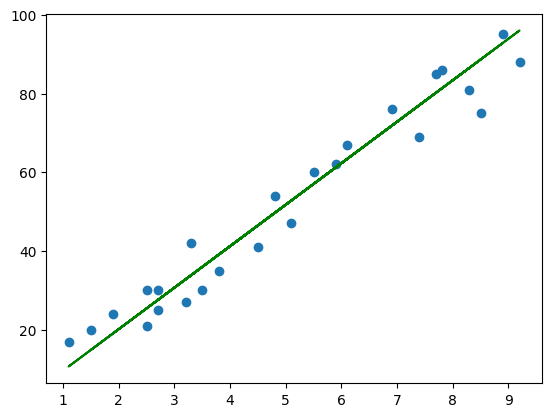

In [11]:
# Plotting the regression line
line= lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x,y)
plt.plot(x, line, color= 'green');
plt.show()

The graph above indicates the linearly fitted line for the data.

**Step 6: Make Predictions**

The trained model is used to predict the values of testing data set.

In [12]:
# Predicting the test set results
y_pred=lr.predict(x_test)
print(y_pred)

[71.78000296 86.53188738 39.11511602 88.63929944 27.52434969 33.84658587
 77.04853311 10.66505321]


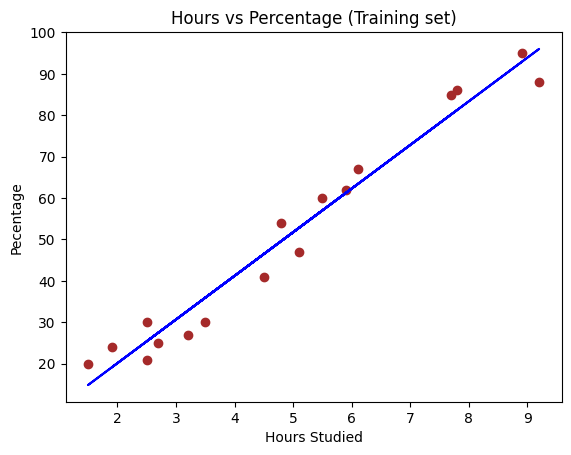

In [13]:
# Visualizing the Training set results
plt.scatter(x_train,y_train, color='brown')
plt.plot(x_train, lr.predict(x_train), color='blue')
plt.title('Hours vs Percentage (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Pecentage')
plt.show()

The graph indicates the fitted line for training data set.

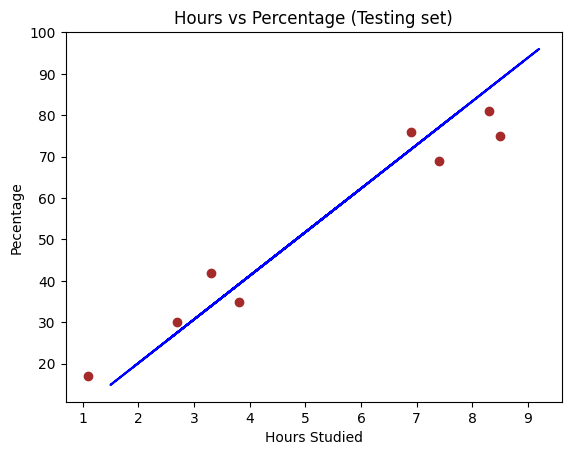

In [19]:
# Visualizing the test set results
plt.scatter(x_test,y_test, color='brown')
plt.plot(x_train, lr.predict(x_train), color='blue')
plt.title('Hours vs Percentage (Testing set)')
plt.xlabel('Hours Studied')
plt.ylabel('Pecentage')
plt.show()

The graph indicates the fitted line for testing data set.

**Step 7: Evaluate the Model**


In [16]:
# Compare the actual values with the predicted ones
comp= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comp

,Actual,Predicted
23,76,71.780003
8,81,86.531887
22,35,39.115116
3,75,88.639299
20,30,27.524350
13,42,33.846586
19,69,77.048533
14,17,10.665053


In [17]:
# Pedicting the score
comp= np.array(9.25)
comp= comp.reshape(-1,1)
pred= lr.predict(comp)
print('If the student studies for 9.25 hrs/day, the score is {}.'.format(pred))

If the student studies for 9.25 hrs/day, the score is [96.54209466].


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
print('Mean Absolute Percentage Error is:', mean_absolute_percentage_error(y_test,y_pred))
print('R- Square is:', r2_score(y_test,y_pred))

Mean Absolute Percentage Error is: 0.14864914666196088
R- Square is: 0.9007854114410855


Conclusion: The model 86% accurate in predicting the scores of student given the no. of hours studied by him/her.